# Problem Statement

Aim of this exercise is to get initial insights of the market segment dataset and cluster customers using DBSCAN clustering algorithm so that appropriate action can be recommended on each segment and improve the business performance.

### Methodology
Model development is divided into multiple steps as mentioned below,
- Data exploring and understanding: This step involves preliminary level data understanding and exploring.
- Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis.
- Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.
- Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type.
- Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
- Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Dependancies

In [1]:
# Dependancies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data is having 200 entries and 5 columns. It includes 4 numeric and 1 categorical columns.

- CustomerID: Unique customer ID
- Gender: Customer gender
- Age: Age of the customer
- Annual Income (k$): Customer's annual income
- Spending score (1-100): Score depending upon purchasing behaviour and past data. Range is 1-100.

## 1. Data Exploration and Understanding

In [4]:
# Customer ID

data.CustomerID.nunique()

200

There are 200 unique entries that means each customer is unique in the dataset.

<AxesSubplot:ylabel='Gender'>

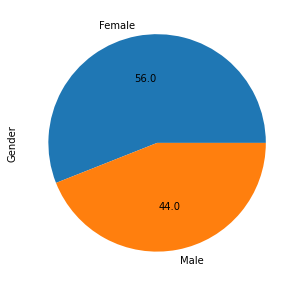

In [5]:
# Gender

data.Gender.value_counts().plot.pie(figsize=(5, 5), autopct="%1.1f")

Customer share for female customers is little higher than male. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

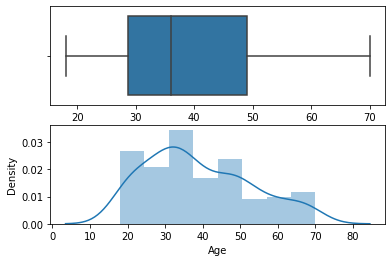

In [6]:
# Age

plt.subplot(2,1,1)
sns.boxplot(data.Age)
plt.subplot(2,1,2)
sns.distplot(data.Age)

Median age of the customers is ~36 yrs. There are no outliers in this column. The distribution looks almost normal.

In [7]:
# rename few columns for convenience of access

data = data.rename(columns={'Annual Income (k$)':'an_inc', 'Spending Score (1-100)': 'spend_score'})
data.head()

,CustomerID,Gender,Age,an_inc,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='an_inc', ylabel='Density'>

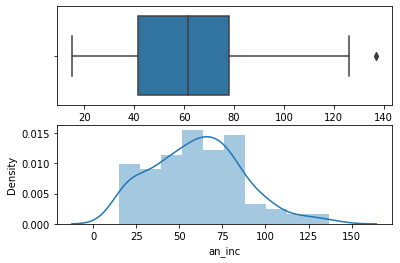

In [8]:
# an_inc

plt.subplot(2,1,1)
sns.boxplot(data.an_inc)
plt.subplot(2,1,2)
sns.distplot(data.an_inc)

Median annual income is around $60k. We observe few outliers in this columns but they aren't large in number. The distribution doesn't look normal.

<AxesSubplot:xlabel='spend_score', ylabel='Density'>

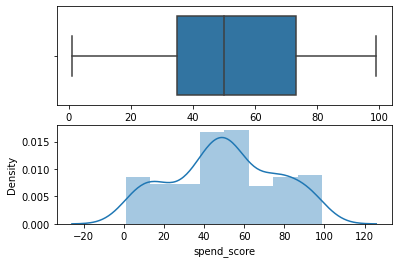

In [9]:
# spend_score

plt.subplot(2,1,1)
sns.boxplot(data.spend_score)
plt.subplot(2,1,2)
sns.distplot(data.spend_score)

Median spend score is around 50. We observe no outliers in this column. The distribution doesn't look normal.

## 2. Data Cleaning

Dataset is having no null entries and also minimal outliers. Hence, we are going to skip this step.

## 3. Data Visualization

<AxesSubplot:>

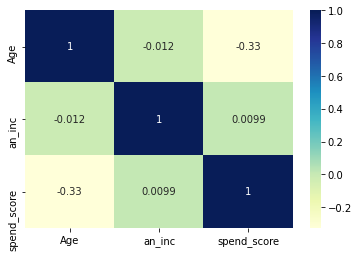

In [10]:
# numeric columns

num_cols = data.select_dtypes(['int64', 'float64']).columns

# removing ID columns 
num_cols = num_cols.drop('CustomerID')

# Heatmapping the correlation

sns.heatmap(data[num_cols].corr(), annot=True, cmap='YlGnBu')

We dont observe any strong relation between numeric data columns here.

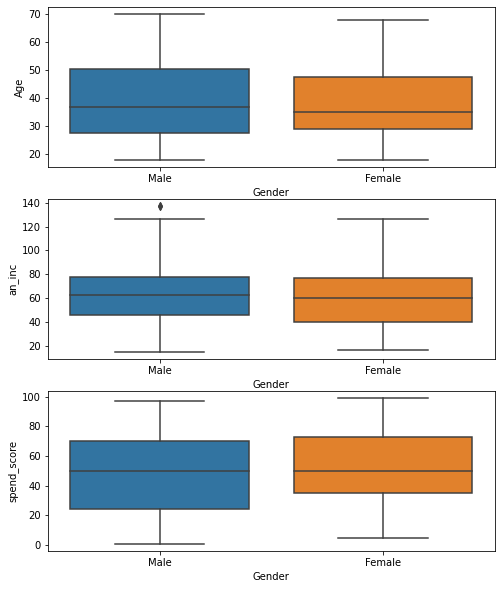

In [11]:
# cat_cols vs num_cols
plt.subplots(figsize=(8, 10))

for i, col in enumerate(num_cols):
    plt.subplot(num_cols.shape[0], 1, i+1)
    sns.boxplot(x=data['Gender'], y=data[col])
    

Observations,
- Male customers have little higher median age as compared to female with wider spread.
- Male customers have higher median annual income as compared to female.
- Female customers have better median spending score as compared to male.

## 4. Data Preparation

For Hierarchical clustering, we would only use numeric data columns as it would use euclidian distance to develop clusters.

In [12]:
# use StandardScaler for num_cols 

scaler = MinMaxScaler()

data_s= scaler.fit_transform(data[num_cols])

data_s = pd.DataFrame(data_s, columns=num_cols, index=data.index)
data_s.head()

,Age,an_inc,spend_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


## 5. Model Development-validation and evaluation

In [13]:
# DBScan with default parameters

clustering = DBSCAN().fit(data_s)

In [14]:
# labesl

clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [15]:
data['labels_it1'] = clustering.labels_
data.head()

,CustomerID,Gender,Age,an_inc,spend_score,labels_it1
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


#### Understanding the clusters 

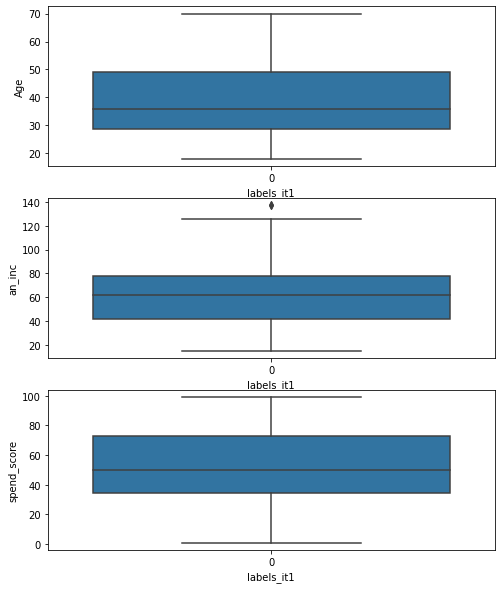

In [16]:
plt.subplots(figsize=(8, 10))

for i, col in enumerate(num_cols):
    plt.subplot(num_cols.shape[0], 1, i+1)
    sns.boxplot(x='labels_it1', y=col, data=data)

<AxesSubplot:xlabel='Age', ylabel='spend_score'>

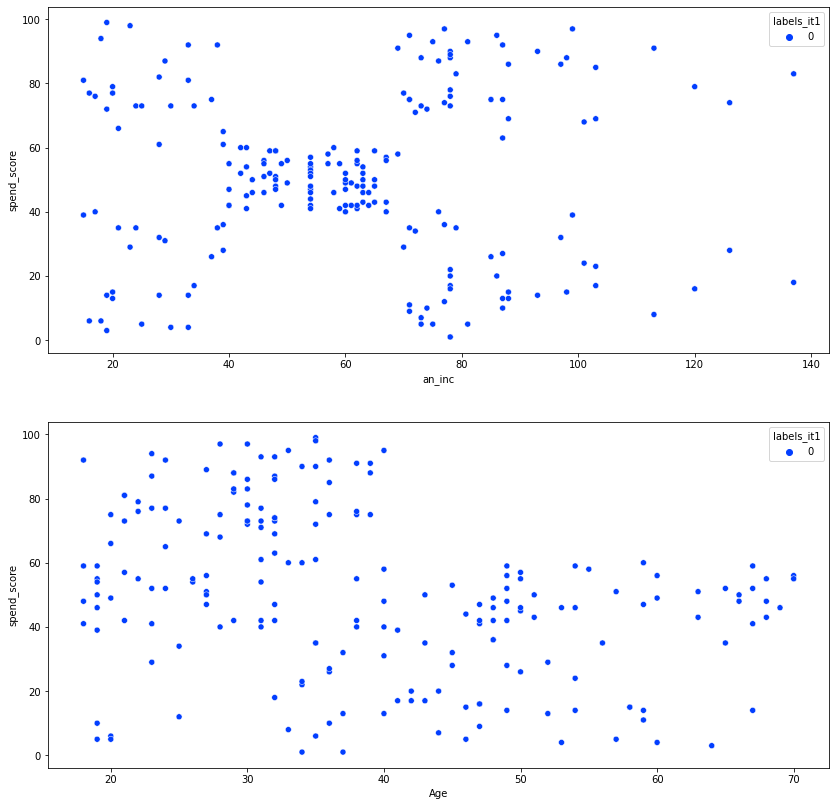

In [17]:
# DBSCAN clusters

plt.subplots(figsize=(14, 14))
plt.subplot(2,1,1)
sns.scatterplot(x='an_inc', y='spend_score', hue='labels_it1', data=data, palette='bright')
plt.subplot(2,1,2)
sns.scatterplot(x='Age', y='spend_score', hue='labels_it1', data=data, palette='bright')

No clusters are formed and that is because higher value of eps (i.e. 0.5) parameter. We would do hyperparameter tuning to improve this.

**Parameters to tune**
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

#### Hyper parameters tuning

In [18]:
# parametrize eps (cluster radius)
params_eps= np.arange(0.01, 0.25, 0.01)
params_min_samp= np.arange(2, 10, 1)
sil = []


for eps in params_eps:
    for min_samples in params_min_samp:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(data_s)
        if np.shape(np.unique(clustering.labels_, return_counts=True))[1]>2:
            n_clus = np.shape(np.unique(clustering.labels_, return_counts=True))[1]
            sil.append([eps, min_samples, round(silhouette_score(data[num_cols], clustering.labels_),3), n_clus])
        else:
            n_clus = np.shape(np.unique(clustering.labels_, return_counts=True))[1]
            sil.append([eps, min_samples, 0, n_clus])

<AxesSubplot:xlabel='min_samples', ylabel='eps'>

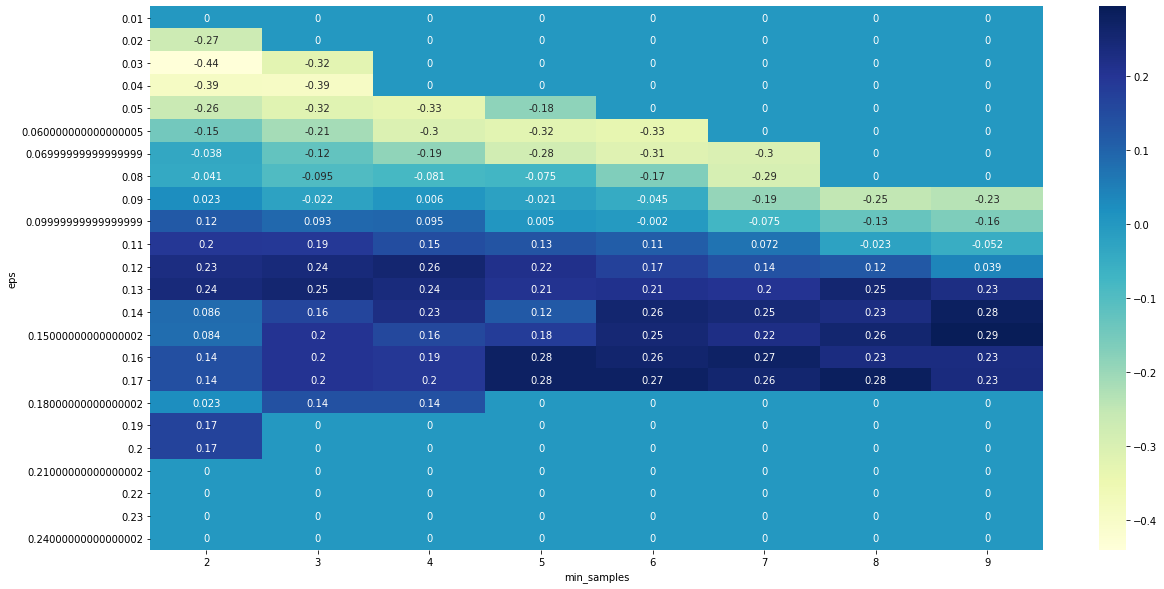

In [19]:
# plotting sil_score and n_clus values

sil_df = pd.DataFrame(sil, columns=['eps', 'min_samples', 'sil_score', 'n_clus'])

# plottting sil_score
plt.subplots(figsize=(20,10))
sns.heatmap(pd.crosstab(index= sil_df['eps'], 
                        columns=sil_df['min_samples'], 
                        values=sil_df['sil_score'], aggfunc=sum), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='min_samples', ylabel='eps'>

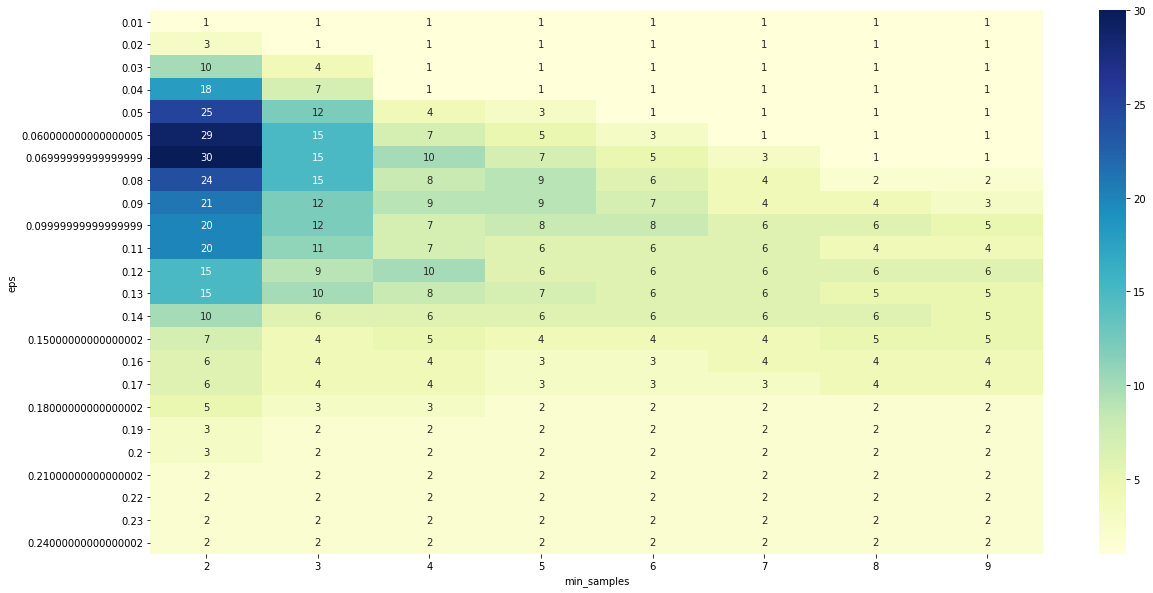

In [20]:
# plotting n_clus

plt.subplots(figsize=(20,10))
sns.heatmap(pd.crosstab(index= sil_df['eps'], 
                        columns=sil_df['min_samples'], 
                        values=sil_df['n_clus'], aggfunc=sum), annot=True, cmap='YlGnBu')

We would use eps=0.15 and min_samples=9 for our final model.

In [21]:
# DBScan with tuned parameters

clustering = DBSCAN(eps=0.15, min_samples=9).fit(data_s)

In [22]:
data['labels_it2'] = clustering.labels_
data.head()

,CustomerID,Gender,Age,an_inc,spend_score,labels_it1,labels_it2
0,1,Male,19,15,39,0,-1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,-1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,-1


#### Understanding the clusters 

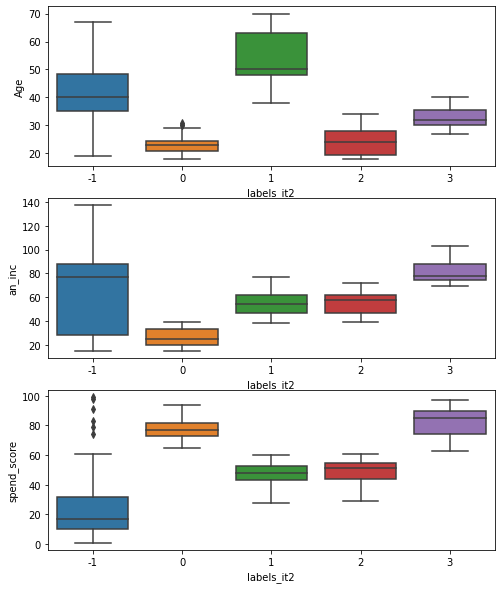

In [23]:
plt.subplots(figsize=(8, 10))

for i, col in enumerate(num_cols):
    plt.subplot(num_cols.shape[0], 1, i+1)
    sns.boxplot(x='labels_it2', y=col, data=data)

- Cluster 0: It is very high spending score cluster with lowest annual income and young age.
- Cluster 1: It is moderate spending score cluster with mid income and relatively higher age.
- Cluster 2: These customers have moderate spending score and moderate income with low age.
- Cluster 3: These customers have very high spending score and high income with mid age.
- Cluster -1: These are the outliers.

<AxesSubplot:xlabel='Age', ylabel='spend_score'>

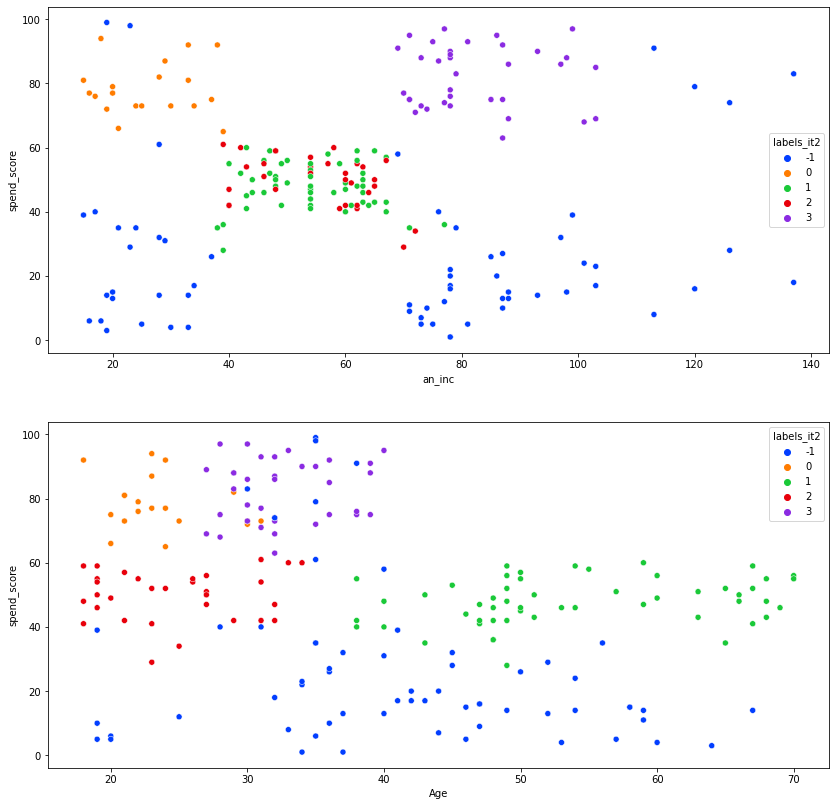

In [24]:
# DBSCAN clusters

plt.subplots(figsize=(14, 14))
plt.subplot(2,1,1)
sns.scatterplot(x='an_inc', y='spend_score', hue='labels_it2', data=data, palette='bright')
plt.subplot(2,1,2)
sns.scatterplot(x='Age', y='spend_score', hue='labels_it2', data=data, palette='bright')

We can clearly observe the clusters developed in graphs. But here low spending score customers are treated as outliers which is clearly not the case. This may be because lower density of the points in that zone.

## 6. Conclusion/Recommendation

**Conclusion**: DBSCAN is suggesting 4 clusters in the dataset. These clusters are showing variation in annual income, age and gender. Here, we are also getting lower spending score customers as outliers. That may be bacause lower density of the points compared to eps value requirement.

-----------